#### Carregar base de dados como dataframe pandas
- previsores contém os dados sobre caracteristicas de cada item.
- classes contém a classificação de cada item (0 para negativo e 1 para positivo).

In [2]:
import pandas as pd

In [3]:
previsores= pd.read_csv('../../data/base breast cancer/entradas-breast.csv')
classes = pd.read_csv('../../data/base breast cancer/saidas-breast.csv')

In [13]:
previsores = previsores.iloc[:,0:30].values
classes = classes.iloc[:,0].values

In [14]:
previsores[:10]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+03, 9.053e-01,
        8.589e+03, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+03, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e+02, 2.750e+02, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+03, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [15]:
from minisom import MiniSom

#### Normalização dos valores

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
normalizador = MinMaxScaler(feature_range = (0,1))
x = normalizador.fit_transform(previsores)

### Construção do Mapa auto orgánizavel
- tamanho = 5 $\sqrt{N}$
- Base com 569 registros
    - tamanho = 5 $\sqrt{569}$
    - tamanho = 119,26 células
- Matriz de 11 x 11

In [52]:
som = MiniSom(x = 11, y = 11, input_len = 30, learning_rate = 1.4, random_seed =2, sigma = 0.2)

In [53]:
som.random_weights_init(previsores)

In [54]:
som.train_random(data = previsores, num_iteration=1000)

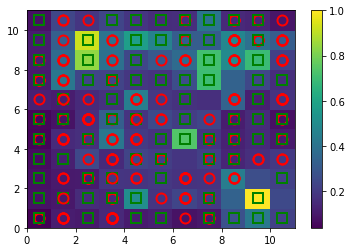

In [55]:
from pylab import pcolor, colorbar, plot
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(previsores):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[classes[i]],
         markerfacecolor = 'None', markersize = 10,
         markeredgecolor = colors[classes[i]], markeredgewidth = 2)